In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [7]:
airlines= pd.read_csv('EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
#normalisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airlines_df = scaler.fit_transform(airlines.iloc[:,1:])
scaled_airlines_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

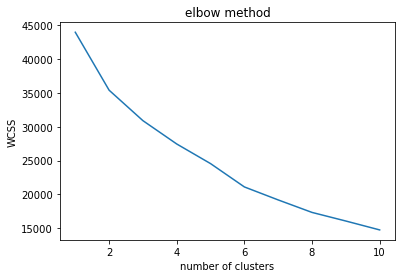

In [9]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_airlines_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#build a cluster
from sklearn.cluster import KMeans
cluster_new = KMeans(n_clusters=4, random_state=42)
cluster_new.fit(scaled_airlines_df)

KMeans(n_clusters=4, random_state=42)

In [11]:
cluster_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [13]:
#Assign clusters to the data set
airlines['clusterid_new'] = cluster_new.labels_
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [14]:
#these are standardized values.
cluster_new.cluster_centers_

array([[-2.98478754e-01, -6.42142013e-02, -6.13747535e-01,
         3.28947498e-02, -6.07426678e-02, -5.17995326e-01,
        -4.91207604e-01, -1.86400083e-01, -1.98822948e-01,
        -2.07899699e-01, -3.48824498e-01],
       [ 1.19130578e+00,  1.02056447e+00,  9.95222056e-02,
         1.36680959e-01, -6.27665798e-02,  6.19234895e-01,
         1.55056071e+00,  3.42272158e+00,  3.67662420e+00,
         2.79402662e-01,  9.08902922e-01],
       [ 4.21685967e-01, -9.97266943e-03,  1.18816125e+00,
        -8.23662416e-02, -5.47626400e-02,  9.03299347e-01,
         7.41625184e-01, -9.44153225e-02, -1.04476981e-01,
         3.70515148e-01,  5.62946631e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01]])

In [16]:
airlines.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2245.555073,43563.850375,94.365969,1.215949,1.019345,1.000395,4646.641532,6.893012,198.932096,0.619029,3688.991709,0.201737
1,1,1731.196532,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249
2,2,1600.001565,116129.633020,136.613459,3.696401,1.002347,1.001565,38990.929577,18.726135,328.384194,0.978873,4886.052426,0.643192
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
